In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
df= pd.read_csv("/kaggle/input/sales-prediction/Marketing_Data.csv")

In [3]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [5]:
# Extract features (X) and target (y)
X = df[["youtube","facebook","newspaper"]]  # Features (YouTube, Facebook, Newspaper)
y = df["sales"]   # Target (Sales)

In [6]:
X.head()

,youtube,facebook,newspaper
0,84.72,19.20,48.96
1,351.48,33.96,51.84
2,135.48,20.88,46.32
3,116.64,1.80,36.00
4,318.72,24.00,0.36


In [7]:
X_features = ['YouTube', 'Facebook', 'Newspaper']
X_features

['YouTube', 'Facebook', 'Newspaper']

In [8]:
# Normalize the features
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm[:5]

array([[-0.9133766 , -0.47430395,  0.55255749],
       [ 1.69808742,  0.35207403,  0.66854624],
       [-0.41645835, -0.38024467,  0.44623448],
       [-0.60089373, -1.44848939,  0.03060814],
       [ 1.37738131, -0.20556315, -1.40475257]])

In [9]:
# Initialize and train the model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y)

SGDRegressor()

In [10]:
# Print model information
print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, Number of weight updates: {sgdr.t_}")
print(f"Model parameters: w: {sgdr.coef_}, b: {sgdr.intercept_}")

SGDRegressor()
Number of iterations completed: 28, Number of weight updates: 4789.0
Model parameters: w: [4.6194106  3.35307698 0.10536082], b: [16.91696242]


In [11]:
# Make predictions
y_pred = sgdr.predict(X_norm)
y_pred[:5]

array([11.16554111, 26.01209537, 13.7651963 ,  9.28751605, 22.44237732])

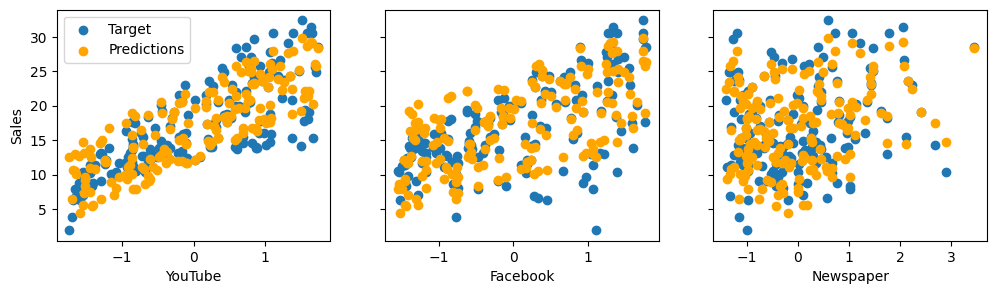

In [12]:
# Plot predictions and targets vs original features
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:, i], y, label='Target')
    ax[i].scatter(X_norm[:, i], y_pred, color='orange', label='Predictions')
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Sales")
ax[0].legend()
plt.show()

In [13]:
# Evaluate model performance
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 3.94545792343744
Mean Absolute Error (MAE): 1.4770433706150996
R-squared Score: 0.9004704906901031


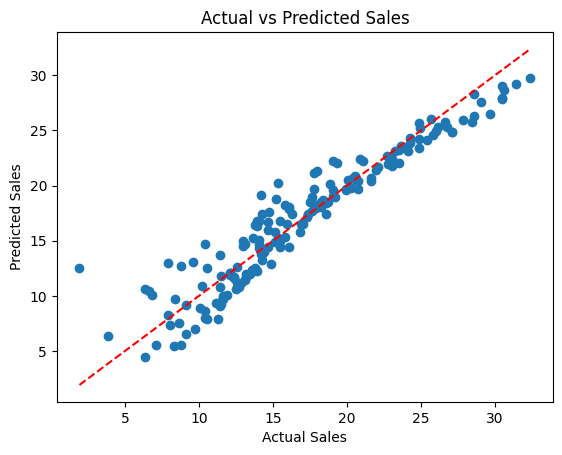

In [14]:
# Plot actual vs predicted values
plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], '--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [15]:
# Get feature importance
feature_importance = sgdr.coef_
print("Feature Importance:", feature_importance)

Feature Importance: [4.6194106  3.35307698 0.10536082]


In [16]:
new_data = np.array([
    [100, 30, 20],  # YouTube, Facebook, Newspaper
    [200, 40, 25],
    [150, 50, 30],
    # Add more data points as needed
])


In [18]:
# Assume scaler and sgdr are already defined from the previous code
X_test = scaler.transform(new_data)
y_test = sgdr.predict(X_test)
print("Predictions of sales on new data:", y_test)


Predictions of sales on new data: [13.76114227 20.18186978 19.81929512]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
def evaluate_test_model(X_test, y_test, scaler, model):
    """
    Evaluate the test model.

    Parameters:
    - X_test (numpy.ndarray): Test features.
    - y_test (numpy.ndarray): True target values.
    - scaler (StandardScaler): Scaler object used for normalization.
    - model (SGDRegressor): Trained model for making predictions.

    Returns:
    - dict: Dictionary containing evaluation metrics.
    """
    # Normalize the test features
    X_test_norm = scaler.transform(X_test)
    
    # Make predictions
    y_pred = model.predict(X_test_norm)
    
    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print evaluation metrics
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    
    # Return evaluation metrics as a dictionary
    evaluation_results = {
        "MSE": mse,
        "MAE": mae,
        "R-squared": r2
    }
    
    return evaluation_results

# Example usage:
# Assuming X_test and y_test are your test features and true target values
evaluation_results = evaluate_test_model(X_test, y_test, scaler, sgdr)
print("Evaluation Results:", evaluation_results)


Mean Squared Error (MSE): 212.16959296324853
Mean Absolute Error (MAE): 14.28319851821623
R-squared Score: -23.462785437142916
Evaluation Results: {'MSE': 212.16959296324853, 'MAE': 14.28319851821623, 'R-squared': -23.462785437142916}


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
